# Audio to Sheet Music Transcription
This project aims to address the issue of musical transcription by creating a machine learning model to convert audio files into notated sheet music. 

# Imports

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from data.dataset import MaestroDataset
from torch.utils.data import DataLoader
import librosa.display

# Data
This project uses the MAESTRO (MIDI and Audio Edited for Synchronous TRacks and Organization) dataset. This dataset contains about 200 hours of piano performance recordings paired with labeled, corresponding MIDI data. The data was collected in partnership with the International Piano-e-Competition, which competitors would perform on Yamaha Disklaviers with an integrated MIDI capture system.

## Load Dataset
Import the Dataset from the MaestroDataset class

In [ ]:
# Initialize dataset
dataset = MaestroDataset(
    root_dir="maestro-v3.0.0",
    year="2017",
    subset_size=5  # for quick loading
)

# Preview number of samples
print(f"Total samples: {len(dataset)}")

Total samples: 5


## Inspect a sample

In [3]:
mel, roll = dataset[0]
print("Mel shape:", mel.shape)   # (1, n_mels, T)
print("Roll shape:", roll.shape) # (88, T)

Mel shape: torch.Size([1, 229, 14558])
Roll shape: torch.Size([88, 14558])


## Visualization
Visualizing both the audio spectrogram and corresponding note activations side-by-side

### Stacked

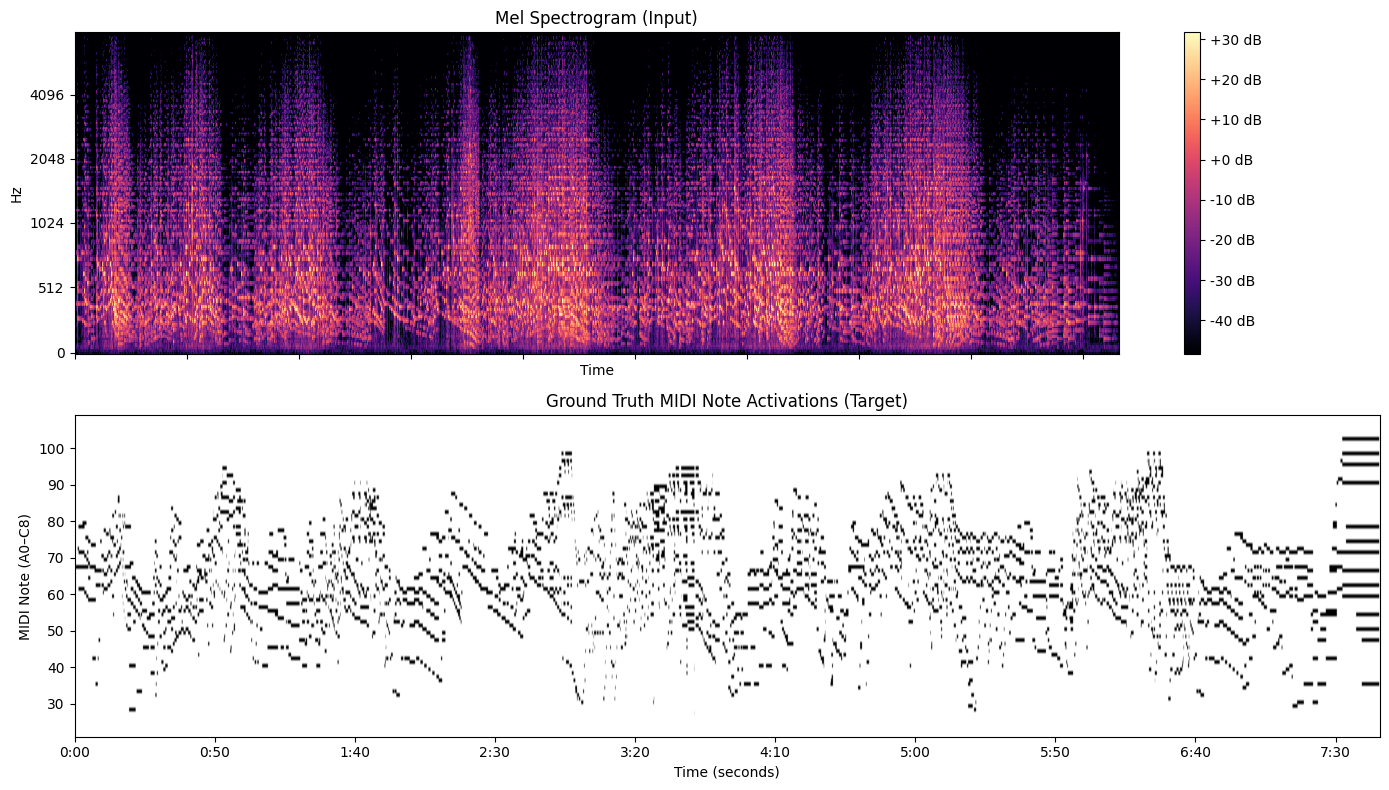

In [4]:
import matplotlib.pyplot as plt
import librosa.display
import numpy as np

fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# --- 1. Mel Spectrogram ---
mel_db = mel.squeeze(0).numpy()

img = librosa.display.specshow(
    mel_db,
    sr=dataset.sr,
    hop_length=dataset.hop_length,
    x_axis="time",
    y_axis="mel",
    fmax=8000,
    cmap="magma",
    ax=ax[0]
)
fig.colorbar(img, ax=ax[0], format="%+2.0f dB")
ax[0].set_title("Mel Spectrogram (Input)")

# --- 2. MIDI Ground Truth ---
roll_np = roll.numpy()

ax[1].imshow(
    roll_np,
    aspect="auto",
    origin="lower",
    cmap="gray_r",
    extent=[0, roll_np.shape[1] * dataset.hop_length / dataset.sr, 21, 109],
)
ax[1].set_title("Ground Truth MIDI Note Activations (Target)")
ax[1].set_xlabel("Time (seconds)")
ax[1].set_ylabel("MIDI Note (A0–C8)")

plt.tight_layout()
plt.show()